In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../app')

import entrofy


In [2]:
df=pd.read_csv('test.csv')
df

,name,gender,career_stage,country,subfield
0,Theresa Hiller,NaN,junior-faculty,OECD,cosmology
1,Shirley Stroud,female,senior-faculty,OECD,cosmology
2,William Bedgood,male,junior-faculty,OECD,NaN
3,Mark Wills,male,junior-faculty,OECD,cosmology
4,Sylvia Kelley,female,senior-faculty,non-OECD,solar
5,Irving Corbin,male,junior-faculty,OECD,astrophysics
6,Cassandra Alzugaray,female,senior-faculty,OECD,astrophysics
7,Saul Schulte,male,junior-faculty,OECD,cosmology
8,Thomas Garza,male,junior-faculty,OECD,astrophysics
9,Betty Porter,female,grad-student,OECD,astrophysics


### Some plots

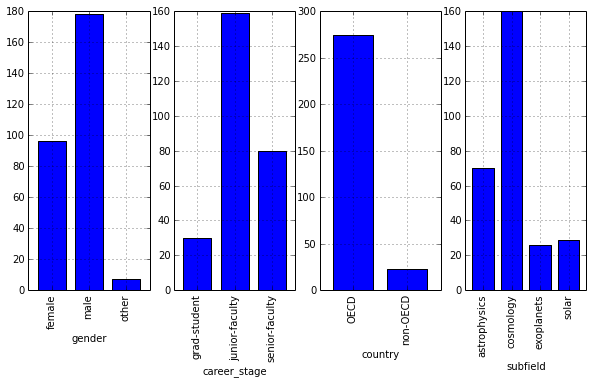

In [215]:
keys=df.keys()
fig, axes = plt.subplots(1,len(keys[1:]),figsize=(10,5))
for num,key in enumerate(keys[1:]):
    df.groupby([key])[key].count().plot(kind='bar', ax=axes[num])
   

#### Plot percentage instead

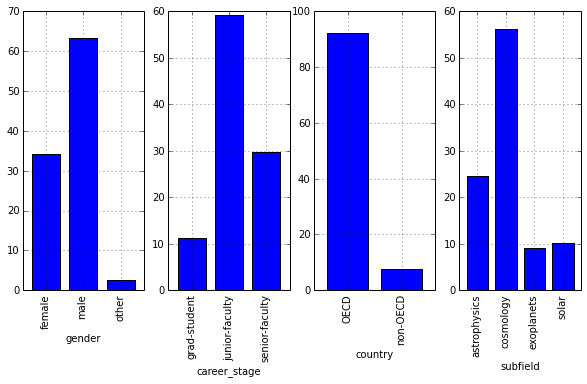

In [220]:
keys=df.keys()
fig, axes = plt.subplots(1,len(keys[1:]),figsize=(10,5))
for num,key in enumerate(keys[1:]):
    df.groupby([key]).count().apply(lambda x: 100*x/float(x.sum()))[key].plot(kind='bar', ax=axes[num])

### Create input array

In [133]:
data=df
for key in keys:
    if not key=='name':
        for col in pd.unique(df[key].ravel()):
            data[col]=np.where(df[key]==col, 1, 0)
        data=data.drop(key,1)


In [134]:
data_array=data.values
data_columns=data.columns
X=data_array[:,1:].astype(bool)

### Run entrofy

In [135]:
score,y=entrofy.entrofy(X,10)

In [136]:
participants=data_array[y]

In [137]:
participants

array([['Shirley Stroud', 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       ['Sylvia Kelley', 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
       ['George Elliott', 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
       ['Carl Collinson', 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0],
       ['Ernest Mccormick', 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       ['Andrew Young', 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1],
       ['Denise Obermeyer', 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       ['Ira Tello', 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
       ['Ila Rozier', 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       ['Andrew Gossard', 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0]], dtype=object)

In [139]:
df_participants=df[df['name'].isin(participants[:,0])]
df_participants


,name,gender,career_stage,country,subfield,nan,female,male,other
1,Shirley Stroud,female,senior-faculty,OECD,cosmology,0,1,0,0
4,Sylvia Kelley,female,senior-faculty,non-OECD,solar,0,1,0,0
19,George Elliott,male,grad-student,OECD,astrophysics,0,0,1,0
42,Carl Collinson,other,junior-faculty,OECD,cosmology,0,0,0,1
86,Ernest Mccormick,male,junior-faculty,non-OECD,exoplanets,0,0,1,0
103,Andrew Young,male,junior-faculty,non-OECD,exoplanets,0,0,1,0
108,Denise Obermeyer,female,junior-faculty,non-OECD,solar,0,1,0,0
123,Ira Tello,male,senior-faculty,OECD,exoplanets,0,0,1,0
204,Ila Rozier,female,grad-student,non-OECD,cosmology,0,1,0,0
298,Andrew Gossard,other,grad-student,OECD,astrophysics,0,0,0,1


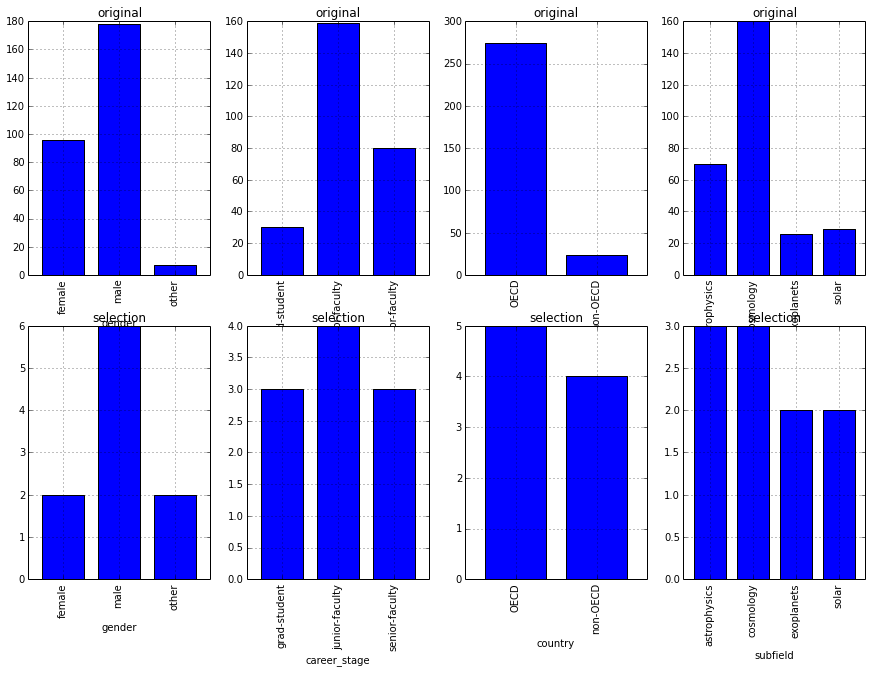

In [181]:
fig, axes = plt.subplots(2,len(keys[1:]),figsize=(15,10))
for num,key in enumerate(keys[1:]):
    df.groupby([key])[key].count().plot(kind='bar',ax=axes[0,num], title='original')
    df_participants.groupby([key])[key].count().plot(kind='bar', ax=axes[1,num], title='selection')

### Change q

In [222]:
print data_columns
q=np.empty(len(data_columns)-1)
q.fill(0.5)
q[1]=0.4; q[2]=0.55; q[3]=0.05 # 40% female, 55% male, 5% other
q[4]=0.5; q[5]=0.4; q[6]=0.1  #50% junior, 40% senior, 10% grad student
q[7]=0.8; q[8]=0.2 #80% OECD, 20$ non-OECD
q[9]=0.25; q[10]=0.25; q[11]=0.25; q[12]=0.25 # 25% of each field

Index([u'name', nan, u'female', u'male', u'other', u'junior-faculty', u'senior-faculty', u'grad-student', u'OECD', u'non-OECD', u'cosmology', u'solar', u'astrophysics', u'exoplanets'], dtype='object')


In [223]:
score,y=entrofy.entrofy(X,20,q=q)

In [224]:
participants=data_array[y]
participants[:,0]

array(['Shirley Stroud', 'Mark Wills', 'Sylvia Kelley', 'Irving Corbin',
       'Cassandra Alzugaray', 'Saul Schulte', 'William Enger',
       'Brenda Davenport', 'George Elliott', 'Diane Jones',
       'David Fitzgerald', 'Donald Hardy', 'Ernestine Adams',
       'Robert Brooks', 'Irene Seal', 'Beth Johnson', 'Dan Dibbles',
       'Denise Obermeyer', 'Ira Tello', 'Larry Hurlock'], dtype=object)

In [225]:
df_participants=df[df['name'].isin(participants[:,0])]

In [226]:
df_participants

,name,gender,career_stage,country,subfield
1,Shirley Stroud,female,senior-faculty,OECD,cosmology
3,Mark Wills,male,junior-faculty,OECD,cosmology
4,Sylvia Kelley,female,senior-faculty,non-OECD,solar
5,Irving Corbin,male,junior-faculty,OECD,astrophysics
6,Cassandra Alzugaray,female,senior-faculty,OECD,astrophysics
7,Saul Schulte,male,junior-faculty,OECD,cosmology
11,William Enger,male,junior-faculty,non-OECD,cosmology
18,Brenda Davenport,female,junior-faculty,non-OECD,astrophysics
19,George Elliott,male,grad-student,OECD,astrophysics
20,Diane Jones,female,senior-faculty,OECD,exoplanets


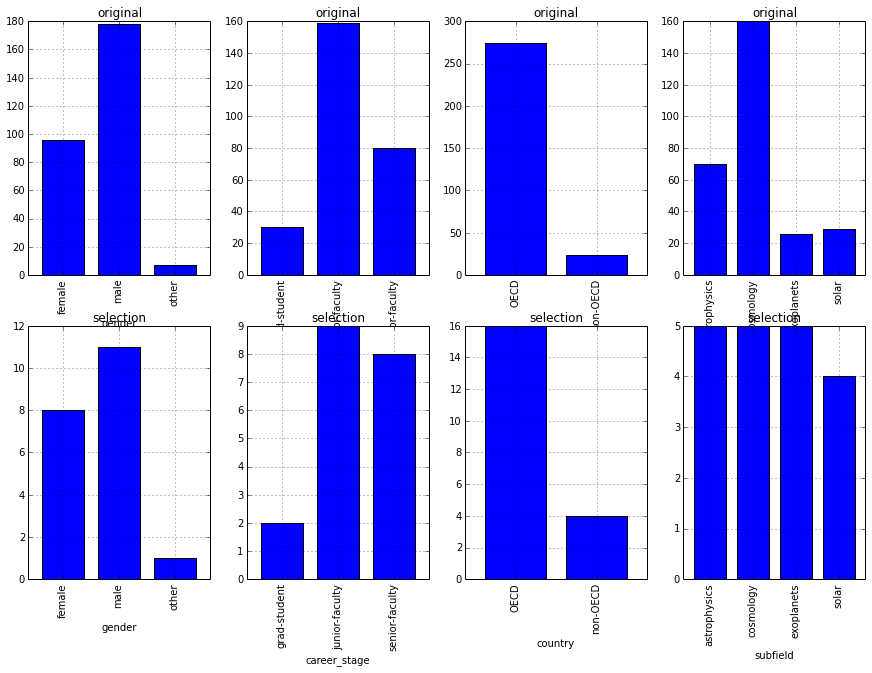

In [227]:
fig, axes = plt.subplots(2,len(keys[1:]),figsize=(15,10))
for num,key in enumerate(keys[1:]):
    df.groupby([key])[key].count().plot(kind='bar',ax=axes[0,num], title='original')
    df_participants.groupby([key])[key].count().plot(kind='bar', ax=axes[1,num], title='selection')